In [1]:
from PIL import Image
from PIL.ExifTags import TAGS

# Bibliotecas a utilizar.
import pandas as pd
import numpy as np 
import seaborn as sns
import os 
import matplotlib.pyplot as plt

In [2]:
dfmr = pd.read_csv('Brain Tumor.csv')

# Lectura del .csv
# Primera vista a la base de datos.
dfmr.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
# Conocer la información que contienen
dfmr.info()
# Vemos que no continen valores nulos o NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
Image                 3762 non-null object
Class                 3762 non-null int64
Mean                  3762 non-null float64
Variance              3762 non-null float64
Standard Deviation    3762 non-null float64
Entropy               3762 non-null float64
Skewness              3762 non-null float64
Kurtosis              3762 non-null float64
Contrast              3762 non-null float64
Energy                3762 non-null float64
ASM                   3762 non-null float64
Homogeneity           3762 non-null float64
Dissimilarity         3762 non-null float64
Correlation           3762 non-null float64
Coarseness            3762 non-null float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0+ KB


In [4]:
# Conocer si la información dada es única para cada valor 
# o si existe dentro de l BD valores de pacientes repetidos.

# De manera similar a la sintaxis SQL hacemos un conteo en la columna 'PatientID'
# Columna que guarda las identificaciones por número de cada uno de los pacientes
print('Total de datos en Patient ID:',dfmr['Image'].count())

#De los cuales podemos obtener cuantos son únicos:
print('Total de Pacientes reales (únicos):',dfmr['Image'].value_counts().shape[0])

# Podemos suponer los datos a utilizar pertenecen a pacientes distintos (por ahora...)

# Conocemos también las llaves es decir cómo están organizadas las columnas
columns = dfmr.keys()
columns = list(columns)
print('---------------------Columnas-------------------')
print(columns)

Total de datos en Patient ID: 3762
Total de Pacientes reales (únicos): 3762
---------------------Columnas-------------------
['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness']


In [5]:
# Parte del preprocesamiento de los datos consiste en la limpieza de los mismos 
# para esto podemos retirar del .csv la información que no necesitamos 
# y que es candidata a eliminarse, para este caso eliminamos el ID (indice de la imagen)

#columns.remove('Image')
print('----------Nuevas columnas--------------')
print('Nuveas columnas:',columns)

----------Nuevas columnas--------------
Nuveas columnas: ['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness']


In [6]:
# Conocimiento del muestreo
# Se debe utilizar un estilo diferente de Data Frame
# En este caso cada imagen contiene su información correspondiente
print('-----------Valores en 1---------------------------')
print(dfmr[dfmr['Class']==1].count())
print('-----------Valores en 0---------------------------')
print(dfmr[dfmr['Class']==0].count())

# Contenido poco desbalanceado 

-----------Valores en 1---------------------------
Image                 1683
Class                 1683
Mean                  1683
Variance              1683
Standard Deviation    1683
Entropy               1683
Skewness              1683
Kurtosis              1683
Contrast              1683
Energy                1683
ASM                   1683
Homogeneity           1683
Dissimilarity         1683
Correlation           1683
Coarseness            1683
dtype: int64
-----------Valores en 0---------------------------
Image                 2079
Class                 2079
Mean                  2079
Variance              2079
Standard Deviation    2079
Entropy               2079
Skewness              2079
Kurtosis              2079
Contrast              2079
Energy                2079
ASM                   2079
Homogeneity           2079
Dissimilarity         2079
Correlation           2079
Coarseness            2079
dtype: int64


In [7]:
# Renombrar la información de cada imagen para manipular desde la base de datos 

# Nombre de las imágenes (Falta la extensión .jpg)
nombre_list = dfmr['Image']
# Definimos la cadena que queremos agregar a cada nombre 
string = '.jpg'
# Suma de cadenas con un método de comprehension list
new_list = [x + string for x in nombre_list]
# Actualización en el Data Frame
dfmr['Image']=new_list
dfmr

# No correr muchas veces sólo una vez

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1.jpg,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2.jpg,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3.jpg,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4.jpg,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5.jpg,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758.jpg,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759.jpg,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760.jpg,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761.jpg,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [8]:
dfmr.loc[24]

Image                  Image25.jpg
Class                            0
Mean                       10.9643
Variance                   619.833
Standard Deviation         24.8964
Entropy                   0.126598
Skewness                   2.72056
Kurtosis                   7.77573
Contrast                   91.6059
Energy                    0.317505
ASM                        0.10081
Homogeneity               0.564082
Dissimilarity              3.77175
Correlation                0.96622
Coarseness            7.45834e-155
Name: 24, dtype: object

Visualización de algunas imágenes


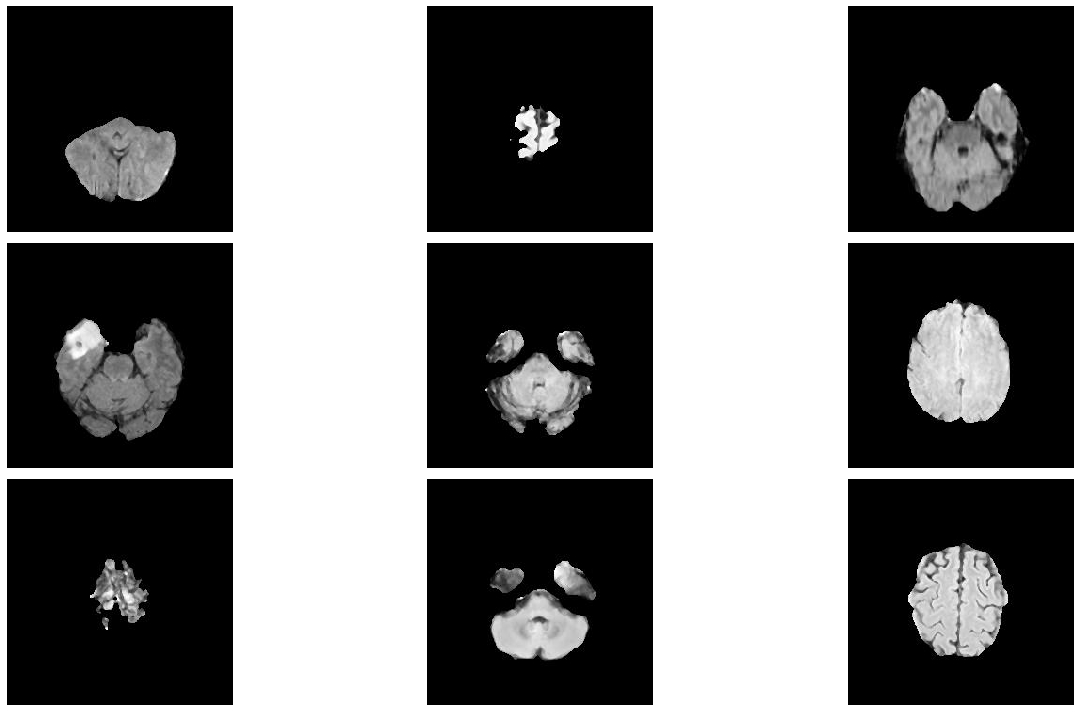

In [9]:
# Visualización (Fines didácticos) Base de datos con la que trabajaremos.

imagenes = dfmr['Image'].values
# Visualización de imágenes randomizado (9)
random_img = [np.random.choice(imagenes) for i in range(9)]
#/Users/davidg/Desktop/Temas Instrumentación/Pruebas PROYECTO f INSTRU/Brain Tumor/Brain Tumor
#Localización de las imágenes en el directorio (Cambiar de acuerdo al usuario)
#img_dir = '//Users/davidg/Desktop/archive/Brain Tumor/Brain Tumor/Image1.jpghome/ironsss/Downloads/septimo/Instrumentación/Proyecto_Final/archive/Brain Tumor/Brain Tumor'
img_dir = '/Users/davidg/Desktop/Temas Instrumentación/Pruebas PROYECTO f INSTRU/Brain Tumor/Brain Tumor/'
print('Visualización de algunas imágenes')
# Ajuste del tamaño
plt.figure(figsize=(20,10))
# Iteración para las imágenes

for i in range(9):
    plt.subplot(3, 3, i + 1) # Arreglo para la orgaización de las imágenes
    img = plt.imread(os.path.join(img_dir, random_img[i])) #Ploteo de acuerdo al directorio
    plt.imshow(img, cmap='gray') 
    plt.axis('off')
    
plt.tight_layout()    

Las dimensiones de la imagen son (240x240), un solo color de canal
El valor máximo del pixel es 255.0000 y el valor mínimo es de 0.0000
El valor promedio de los pixeles es 14.4309 y su desviación estándar es 54.4070


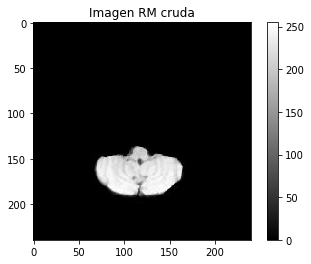

In [10]:
sample_img = dfmr.Image[889]  # Cambiar valor para cualquier imagen
raw_image = plt.imread(os.path.join(img_dir, sample_img)) # lectura de directorio por nombre
plt.imshow(raw_image, cmap='gray') #impresión
plt.colorbar() # agregar escala de color
plt.title('Imagen RM cruda')
print(f"Las dimensiones de la imagen son ({raw_image.shape[0]}x{raw_image.shape[1]}), un solo color de canal")
print(f"El valor máximo del pixel es {raw_image.max():.4f} y el valor mínimo es de {raw_image.min():.4f}")
print(f"El valor promedio de los pixeles es {raw_image.mean():.4f} y su desviación estándar es {raw_image.std():.4f}")

Text(0, 0.5, 'Número de pixeles en la imagen')

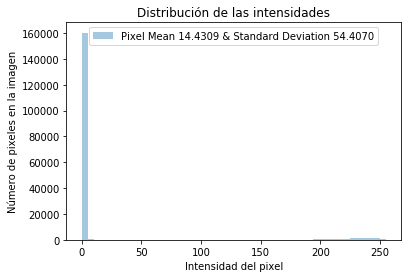

In [11]:
# Graficar histograma de la distribución de los pixeles
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribución de las intensidades')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Número de pixeles en la imagen')

In [12]:
from keras_preprocessing.image import ImageDataGenerator

In [13]:
# Normalización
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

### Standardization

The `image_generator` you created above will act to adjust your image data such that the new mean of the data will be zero, and the standard deviation of the data will be 1.  

In other words, the generator will replace each pixel value in the image with a new value calculated by subtracting the mean and dividing by the standard deviation.

$$\frac{x_i - \mu}{\sigma}$$

Run the next cell to pre-process your data using the `image_generator`. In this step you will also be reducing the image size down to 320x320 pixels.

In [14]:
generator = image_generator.flow_from_dataframe(
        dataframe= dfmr,
        directory=img_dir,
        x_col="Image", # features
        y_col= ['Class'], # labels
        class_mode="raw", # 'Class' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 3762 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dimesiones (320x320)
Promedio:4.3720 Minimo:-0.2860
Valor promedio generado:0.0000 desviación estándar1.0000


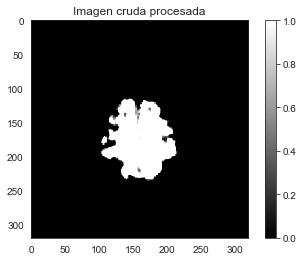

In [15]:
# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(4)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Imagen cruda procesada')
print(f"Dimesiones ({generated_image.shape[1]}x{generated_image.shape[2]})")
print(f"Promedio:{generated_image.max():.4f} Minimo:{generated_image.min():.4f}")
print(f"Valor promedio generado:{generated_image.mean():.4f} desviación estándar{generated_image.std():.4f}")

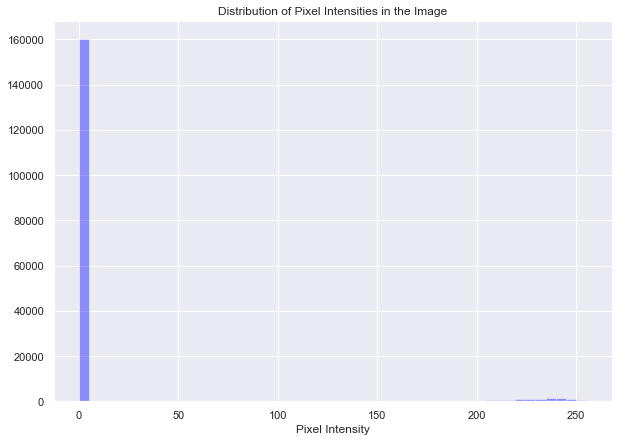

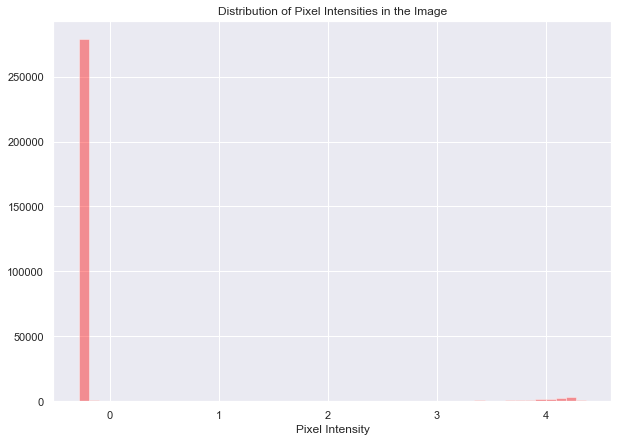

In [16]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(),color='blue',kde=False)
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.show()
# Plot histogram for generated image
plt.figure(figsize=(10, 7))
sns.distplot(generated_image[0].ravel(),color='red',kde=False)

# Place legendS
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.show()

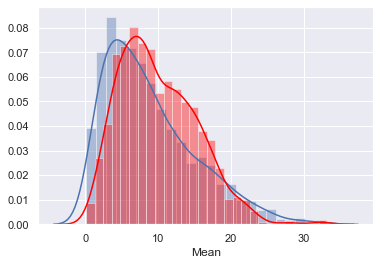

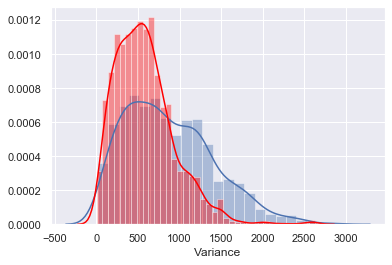

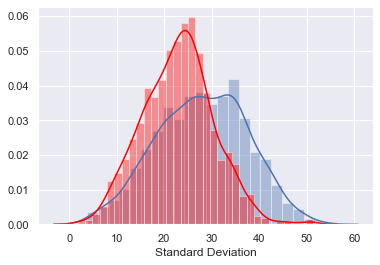

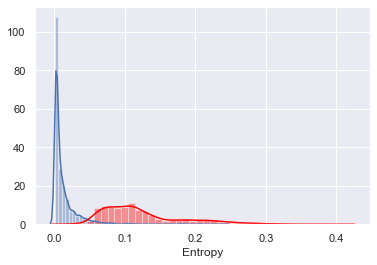

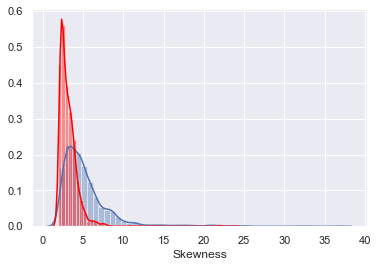

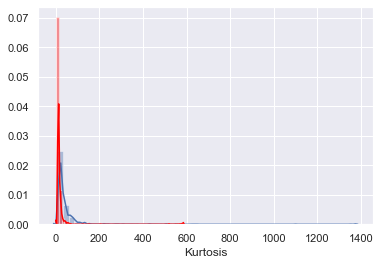

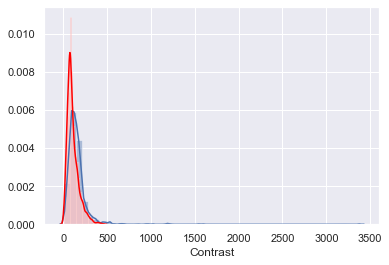

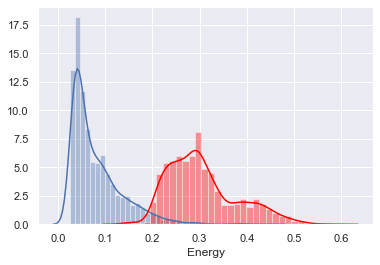

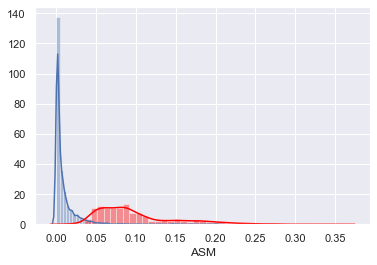

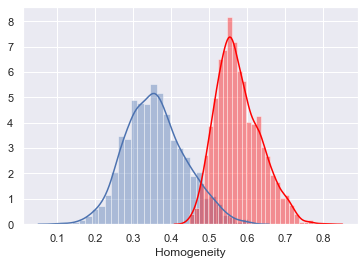

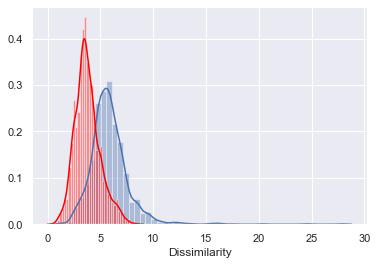

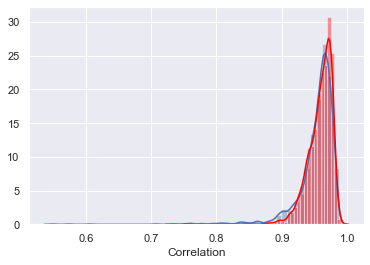

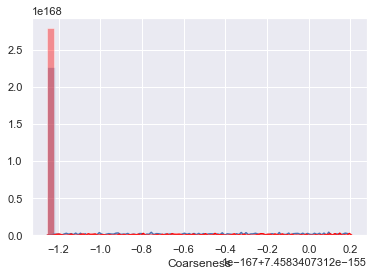

In [17]:
# Descomentar las dos lineas siguientes si es la primera vez que se corre el código 
# de lo contrario mantener comentadas 
columns.remove('Image')
columns.remove('Class')
for column in columns: 
    san = dfmr[dfmr['Class']==1]
    enf = dfmr[dfmr['Class']==0]
    sns.distplot(san[column])
    sns.distplot(enf[column],color='red')
    plt.show()

In [18]:
dfmr.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1.jpg,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2.jpg,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3.jpg,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4.jpg,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5.jpg,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


### Segundo laboratorio

Debido al desbalance que puede exitir en algunas bases de datos respecto a la información que se tiene se relizan protocolos para balancear la información para esto, se realiza primero un análisis de frecuencias 

Total sanos: 1683 % 0.4473684210526316
Total enfermos: 2079 % 0.5526315789473685
Total de pacientes: 3762


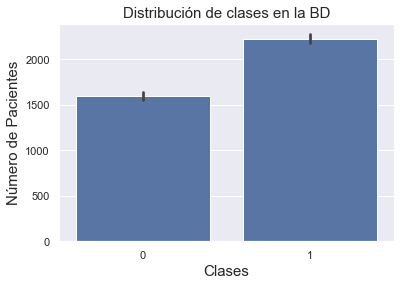

In [19]:
# Utilizaremos las bibliotecas que ya se encuntran cargadas para manipulación y visualización.
# En este caso todas las imagenes cuentan con información balanceada sin embargo podemos hacer un análisis 
# respecto a la frecuencia de sanos y enfermos.

Tsan =  san['Class'].count()
Tenf =  enf['Class'].count()
print('Total sanos:',Tsan,'%',Tsan/(Tsan+Tenf))
print('Total enfermos:',Tenf,'%',Tenf/(Tsan+Tenf))
print('Total de pacientes:',Tsan+Tenf)

# Plot up the distribution of counts
sns.barplot(dfmr['Class'].values,dfmr.index, color='b')
plt.title('Distribución de clases en la BD', fontsize=15)
plt.ylabel('Número de Pacientes', fontsize=15)
plt.xlabel('Clases', fontsize=15)
plt.show()
# Notamos que las poblaciones están balanceadas sin embargo eso no sucede en la mayoría de las bases de datos.

### Weighted Loss Equation
Calculate the loss for the zero-th label (column at index 0)

- The loss is made up of two terms.  To make it easier to read the code, you will calculate each of these terms separately.  We are giving each of these two terms a name for explanatory purposes, but these are not officially called $loss_{pos}$ or $loss_{neg}$

    - $loss_{pos}$: we'll use this to refer to the loss where the actual label is positive (the positive examples).
    - $loss_{neg}$: we'll use this to refer to the loss where the actual label is negative (the negative examples).  

$$ loss^{(i)} = loss_{pos}^{(i)} + loss_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

As before, calculate the two terms that make up the loss function.  Notice that you are working with more than one class (represented by columns).  In this case, there are two classes.

Start by calculating the loss for class `0`.

$$ loss^{(i)} = loss_{pos}^{(i)} + loss_{neg}^{(i)} $$

$$loss_{pos}^{(i)} = -1 \times weight_{pos}^{(i)} \times y^{(i)} \times log(\hat{y}^{(i)})$$

$$loss_{neg}^{(i)} = -1 \times weight_{neg}^{(i)} \times (1- y^{(i)}) \times log(1 - \hat{y}^{(i)})$$

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution</b></font>
</summary>
<p>
<code>
-- # calculate the loss from the positive predictions, for class 1
loss_1_pos = -1 * np.sum(w_p[1] * 
                y_true[:, 1] * 
                np.log(y_pred[:, 1])
              )
print(f"loss_1_pos: {loss_1_pos:.4f}")
    
-- # Calculate the loss from the negative predictions, for class 1
loss_1_neg = -1 * np.sum( 
                w_n[1] * 
                (1 - y_true[:, 1]) * 
                np.log(1 - y_pred[:, 1])
              )
print(f"loss_1_neg: {loss_1_neg:.4f}")

-- # add the two loss terms to get the total loss for class 1
loss_1 = loss_1_neg + loss_1_pos
print(f"loss_1: {loss_1:.4f}")
    </code>
</p>


In [20]:
# Calcular las perdidas de entropía para la clase 0 y 1

# Sumamos las poblaciones de clases de una forma distinta a la anterior 

clases = [np.sum(dfmr['Class']==1),np.sum(dfmr['Class']==0)]
print(clases)
print(clases/dfmr['Class'].count())

[1683, 2079]
[0.44736842 0.55263158]


In [21]:
# Pesos positivos
wp = clases/(dfmr['Class'].count())
print('Pesos positivos:',wp)
clases.reverse()
wn = clases/(dfmr['Class'].count())
print('Pesos negativos:',wn)

Pesos positivos: [0.44736842 0.55263158]
Pesos negativos: [0.55263158 0.44736842]


In [22]:
# Creando un modelo donde suponemos que las predicciones son las mismas
y_pred = np.ones([dfmr['Class'].count(),2])
y_pred[:,0] = wp[0] * y_pred[:,0]
y_pred[:,1] = wp[1] * y_pred[:,1]
y_pred[:,0]

array([0.44736842, 0.44736842, 0.44736842, ..., 0.44736842, 0.44736842,
       0.44736842])

In [23]:
# calculate the loss from the positive predictions, for class 0
loss_0_pos = -1 * np.sum(wp[0] *wp[1]* np.log(y_pred[:, 0]))
print(f"loss_0_pos: {loss_0_pos:.4f}")

# Calculate the loss from the negative predictions, for class 0
loss_0_neg = -1 * np.sum(wn[0]*(1 - wp[1]) * np.log(1 - y_pred[:, 0]))
print(f"loss_0_neg: {loss_0_neg:.4f}")

loss_0 = loss_0_neg + loss_0_pos
print(f"loss_0: {loss_0:.4f}")

loss_0_pos: 748.1302
loss_0_neg: 551.5961
loss_0: 1299.7263


In [24]:
# calculate the loss from the positive predictions, for class 1
loss_1_pos = -1 * np.sum(wp[1] *wp[1]* np.log(y_pred[:, 1]))
print(f"loss_1_pos: {loss_1_pos:.4f}")

# Calculate the loss from the negative predictions, for class 1
loss_1_neg = -1 * np.sum( wn[1]*(1 - wp[1])* np.log(1 - y_pred[:, 1]))
print(f"loss_1_neg: {loss_1_neg:.4f}")

loss_1 = loss_1_neg + loss_1_pos
print(f"loss_1: {loss_1:.4f}")

loss_1_pos: 681.3834
loss_1_neg: 605.6292
loss_1: 1287.0126


In [25]:
abs(loss_1-loss_0)

12.713681129340785

In [26]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """        
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [27]:
train_generator=get_train_generator(dfmr,img_dir,'Image',['Class'])

getting train generator...
Found 3762 validated image filenames.


In [28]:
train_generator.labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

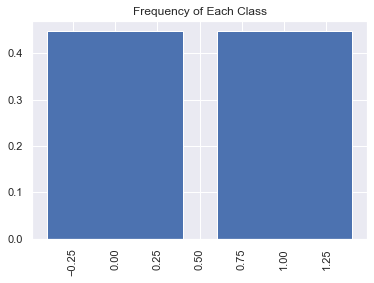

In [29]:
plt.xticks(rotation=90)
plt.bar(x=[0,1], height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

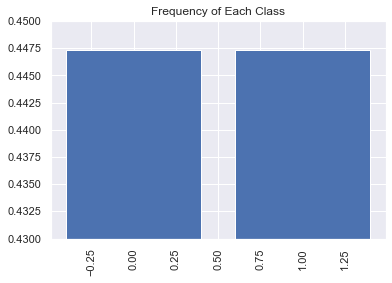

In [30]:
plt.xticks(rotation=90)
plt.bar(x=[0,1], height=np.mean(generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.ylim(0.43,0.45)
plt.show()

In [31]:
labels=['positivo','negativo']

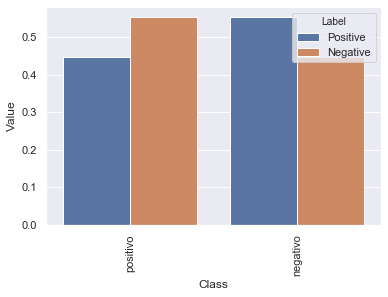

In [32]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": wp})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(wn)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [33]:
pos_weights = wn
neg_weights = wp
pos_contribution = wp * pos_weights 
neg_contribution = wn * neg_weights

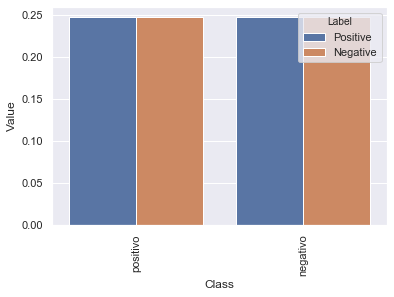

In [34]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [35]:
# Implementando de manera general los valores de pesos positivos y negativos 
# para finalmente implementar una función de perdida de pesos

def check_for_leakage(df1, df2,col):
    """
    Si existen valores compartidos en ambos sets de datos regresara un valor lógico True
    """

    df1_patients_unique = set(df1[col].values)
    df2_patients_unique = set(df2[col].values)
    
    patients_in_both_groups = df1_patients_unique.intersection(df2_patients_unique)

    # leakage contains true if there is patient overlap, otherwise false.
    leakage = len(patients_in_both_groups) # boolean (true if there is at least 1 patient in both groups)
    
    if leakage > 0:
        leakage = True
    else:
        leakage = False
    
    return leakage

### Set de Entrenamiento Validación y Prueba

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x,y = dfmr.Class,dfmr.Image

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [39]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """        
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [40]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for validation set and test test set using 
    normalization statistics from training set.

    Args:
      valid_df (dataframe): dataframe specifying validation data.
      test_df (dataframe): dataframe specifying test data.
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        test_generator (DataFrameIterator) and valid_generator: iterators over test set and validation set respectively
    """
    print("getting train and valid generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image", 
        y_col=['Class'], 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [41]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            #loss += -1*(K.mean(pos_weights[i] * y_true[:,i] * K.log(y_pred[:,i] + epsilon)+ neg_weights[i] * (1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + epsilon), axis = 0))
            loss += -(K.mean( pos_weights[i] * y_true[:,i] * K.log(y_pred[:,i] + epsilon) +neg_weights[i] * (1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + epsilon), axis = 0))
            #complete this line
        return loss
    
        ### END CODE HERE ###
    return weighted_loss

In [42]:
get_weighted_loss(pos_weights,neg_weights)

<function __main__.get_weighted_loss.<locals>.weighted_loss(y_true, y_pred)>

In [43]:
train_df = pd.DataFrame({'Image':y_train,'Class':x_train})
test_df = pd.DataFrame({'Image':y_test,'Class':x_test})
test_df

,Image,Class
1497,Image1498.jpg,1
993,Image994.jpg,0
1859,Image1860.jpg,1
2939,Image2940.jpg,1
615,Image616.jpg,0
...,...,...
2433,Image2434.jpg,0
315,Image316.jpg,1
935,Image936.jpg,0
1259,Image1260.jpg,1


In [44]:
IMAGE_DIR = img_dir
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image",['Class'])


getting train generator...
Found 3009 validated image filenames.


In [45]:
print(len(train_df))
test_df2 = test_df[0:200]
valid_df = test_df[200:]
print(len(test_df))
print(len(valid_df))


3009
753
553


In [46]:
valid_generator, test_generator= get_test_and_valid_generator(valid_df, test_df2, train_df, IMAGE_DIR, "Image",['Class'])

getting train and valid generators...
Found 3009 validated image filenames.
Found 553 validated image filenames.
Found 200 validated image filenames.


In [47]:
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

#import util

Using TensorFlow backend.
/Users/davidg/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/davidg/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/davidg/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/davidg/opt/anaconda3/lib/python3.7

In [48]:
pos_weights[0]

0.5526315789473685

In [49]:
neg_weights

array([0.44736842, 0.55263158])

In [50]:
# Test
sess = K.get_session()
with sess.as_default() as sess:
    print("Test example:\n")
    y_true = K.constant(np.array(
        [[1, 1, 1],
         [1, 1, 0],
         [0, 1, 0],
         [1, 0, 1]]
    ))
    print("y_true:\n")
    print(y_true.eval())

    w_p = np.array([0.25, 0.25, 0.5])
    w_n = np.array([0.75, 0.75, 0.5])
    print("\nw_p:\n")
    print(w_p)

    print("\nw_n:\n")
    print(w_n)

    y_pred_1 = K.constant(0.7*np.ones(y_true.shape))
    print("\ny_pred_1:\n")
    print(y_pred_1.eval())

    y_pred_2 = K.constant(0.3*np.ones(y_true.shape))
    print("\ny_pred_2:\n")
    print(y_pred_2.eval())

    # test with a large epsilon in order to catch errors
    L = get_weighted_loss(w_p, w_n, epsilon=1)

    print("\nIf we weighted them correctly, we expect the two losses to be the same.")
    L1 = L(y_true, y_pred_1).eval()
    L2 = L(y_true, y_pred_2).eval()
    print(f"\nL(y_pred_1)= {L1:.4f}, L(y_pred_2)= {L2:.4f}")
    print(f'Difference is L1 - L2 = {L1 - L2:.4f}')
    print('Valor estimado de la diferencia',L1-L2)

Test example:

y_true:

[[1. 1. 1.]
 [1. 1. 0.]
 [0. 1. 0.]
 [1. 0. 1.]]

w_p:

[0.25 0.25 0.5 ]

w_n:

[0.75 0.75 0.5 ]

y_pred_1:

[[0.7 0.7 0.7]
 [0.7 0.7 0.7]
 [0.7 0.7 0.7]
 [0.7 0.7 0.7]]

y_pred_2:

[[0.3 0.3 0.3]
 [0.3 0.3 0.3]
 [0.3 0.3 0.3]
 [0.3 0.3 0.3]]

If we weighted them correctly, we expect the two losses to be the same.

L(y_pred_1)= -0.4956, L(y_pred_2)= -0.4956
Difference is L1 - L2 = 0.0000
Valor estimado de la diferencia 0.0


In [51]:
# create the base pre-trained model
base_model = DenseNet121(weights='densenet.hdf5', include_top=False)

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss([pos_weights[0]], [neg_weights[0]]))

Epoch 1/50
100/100 [==============================] - 1478s 15s/step - loss: 0.0185 - val_loss: 0.0717
Epoch 2/50
100/100 [==============================] - 1475s 15s/step - loss: 0.0139 - val_loss: 0.2818
Epoch 3/50
100/100 [==============================] - 1480s 15s/step - loss: 0.0196 - val_loss: 0.0249
Epoch 4/50
100/100 [==============================] - 1463s 15s/step - loss: 0.0162 - val_loss: 0.4675
Epoch 5/50
100/100 [==============================] - 1479s 15s/step - loss: 0.0129 - val_loss: 0.4928
Epoch 6/50
100/100 [==============================] - 1473s 15s/step - loss: 0.0239 - val_loss: 0.1215
Epoch 7/50
100/100 [==============================] - 1465s 15s/step - loss: 0.0238 - val_loss: 1.4156
Epoch 8/50
100/100 [==============================] - 1469s 15s/step - loss: 0.0242 - val_loss: 0.4037
Epoch 9/50
100/100 [==============================] - 1489s 15s/step - loss: 0.0240 - val_loss: 0.0527
Epoch 10/50
100/100 [==============================] - 1476s 15s/step - l

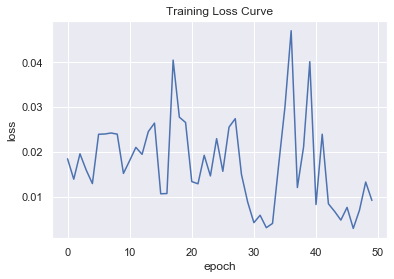

In [71]:
history = model.fit_generator(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=100, 
                              validation_steps=50, 
                              epochs = 50)


plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [72]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))

In [64]:
import util


In [65]:
import sys
sys.path.append('/Users/davidg/opt/anaconda3/envs/ComputerVision/lib/python3.7/site-packages')

In [66]:
import cv2

Error in generating ROC curve for negativo. Dataset lacks enough examples.


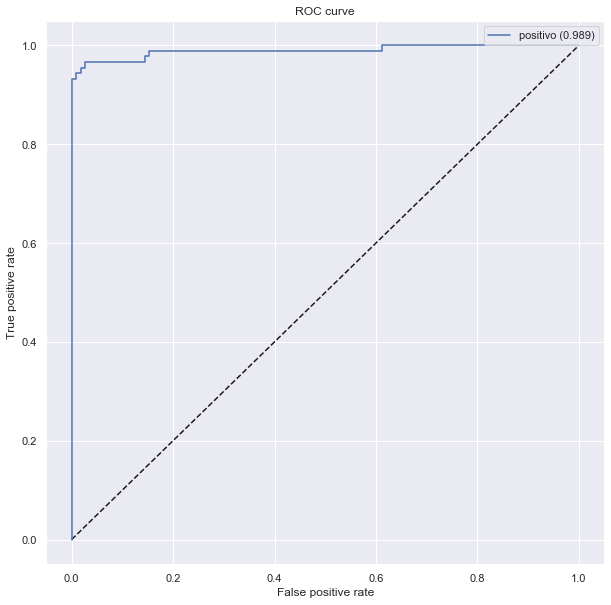

In [76]:
auc_rocs = util.get_roc_curve(labels, predicted_vals, test_generator)

Loading original image
Generating gradcam for class 0
Generating gradcam for class 1


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_35' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

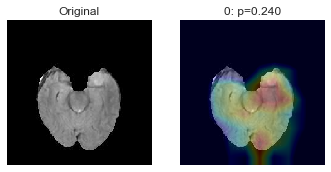

In [77]:
util.compute_gradcam(model, 'Image2940.jpg', IMAGE_DIR, dfmr, ['0','1'],['0','1'])

Loading original image
Generating gradcam for class positivo
Generating gradcam for class negativo


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_37' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

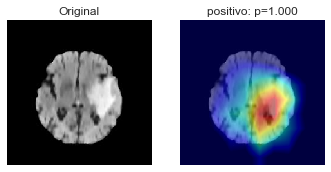

In [78]:
util.compute_gradcam(model, 'Image3.jpg', IMAGE_DIR, dfmr, labels ,labels)

Loading original image
Generating gradcam for class positivo
Generating gradcam for class negativo


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_39' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

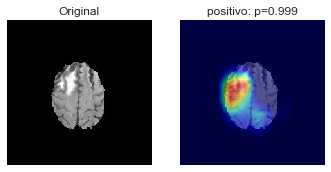

In [79]:
util.compute_gradcam(model, 'Image2999.jpg', IMAGE_DIR, dfmr, labels,labels)

Loading original image
Generating gradcam for class positivo
Generating gradcam for class negativo


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_41' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

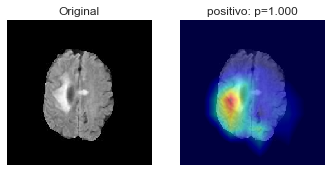

In [80]:
util.compute_gradcam(model, 'Image3500.jpg', IMAGE_DIR, dfmr, labels,labels)

Loading original image
Generating gradcam for class positivo
Generating gradcam for class negativo


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_43' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

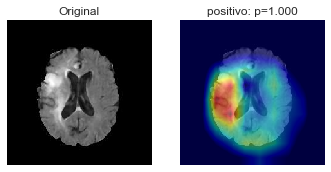

In [81]:
util.compute_gradcam(model, 'Image2540.jpg', IMAGE_DIR, dfmr, labels,labels)

Loading original image
Generating gradcam for class positivo
Generating gradcam for class negativo


ValueError: slice index 1 of dimension 1 out of bounds. for 'strided_slice_45' (op: 'StridedSlice') with input shapes: [?,1], [2], [2], [2] and with computed input tensors: input[1] = <0 1>, input[2] = <1 2>, input[3] = <1 1>.

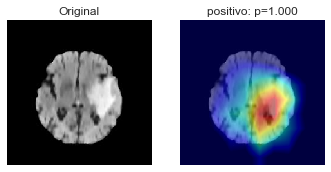

In [82]:
util.compute_gradcam(model, 'Image3.jpg', IMAGE_DIR, dfmr, labels,labels)